

#### 我查询了泰坦尼克号的文档和影视资料，得知灾难发生时许多游客发扬了绅士精神，老弱妇女儿童先行，现在想通过数据探究一下几个问题：
>1 幸存者的性别是否影响了幸存几率(女性更容易幸存)

>2 幸存者中是否是儿童和老年人得到更多的幸存机会

In [355]:
#/usr/bin/env python
# -*- coding: UTF-8 -*-
% matplotlib inline
import sys
reload(sys)
sys.setdefaultencoding('utf-8')
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltt
titanic_data=pd.read_csv("/Users/peng/P4/titanic-data.csv") #修改为自己的文件路径

In [356]:
titanic_data.info()

#### Cabin和Age，Embarked 存在空缺值

In [357]:
#观察总数据
titanic_data
# noise_df = pd.DataFrame(np.random.random(titanic_data.shape),columns=titanic_data.columns)

titanic_data["count"]=1#对原始数据添加一列，方便统计人数
titanic_data.pop('Cabin')
titanic_data=titanic_data.dropna(axis=0,how='any')

将原始总数据进行了初步加工，添加了count列用于统计人数，删除了Cabin列，因为船舱等级与本次数据探究无关，删除了部分有空缺无数据的行

In [367]:
#对Age变量进行分组 0-90，每10岁为一组
bins=np.arange(0,90,10)
titanic_data['Age_group']=pd.cut(titanic_data['Age'],bins)


survival
Dead        0.595506
survived    0.404494
Name: count, dtype: float64

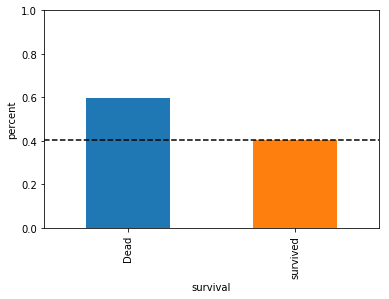

In [368]:
titanic_count=titanic_data['count'].count()
survived_count=titanic_data.groupby('Survived')['count'].count()
survived_percent=(survived_count/titanic_count)
print survived_percent
survived_percent.index = ['Dead','survived']
survived_percent.index.rename('survival',inplace=True)
ax=survived_percent.plot(kind='bar')
ax.set_ylabel('percent')
ax.set_ylim(0,1)
ax.axhline(survived_percent[1], c='black', ls='--')# -- 标记出总体幸存比例
survived_percent


####  遇难者与幸存者所占比例

Sex
female    259
male      453
Name: count, dtype: int64

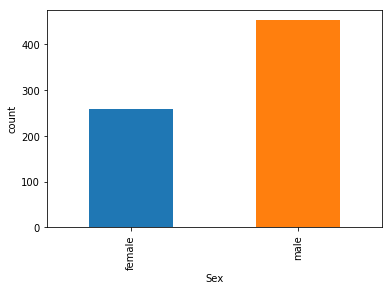

In [369]:

all_sex_data=titanic_data.groupby('Sex')['count'].count()

ax=all_sex_data.plot(kind='bar')
ax.set_ylabel('count')


all_sex_data

#### 上图显示了男性与女性游客的数量对比，包括幸存者和遇难者

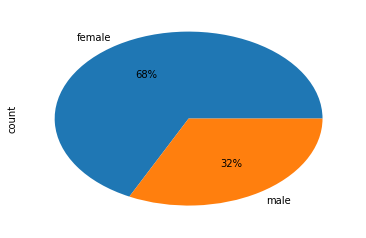

In [370]:
#将数据进行分组 取出幸存者
survive_titanic_data=titanic_data.groupby('Survived').get_group(1)
survive_sex_data=survive_titanic_data.groupby('Sex')['count'].count()
ax=survive_sex_data.plot(kind='pie',autopct='%.0f%%')

#### 幸存者中68%是女性，男性占比32%

In [371]:
female_survive_data=survive_titanic_data.groupby('Sex').get_group('female')
female_survive_data

PassengerId  Survived  Pclass  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
15            16         1       2   
22            23         1       3   
25            26         1       3   
39            40         1       3   
43            44         1       2   
44            45         1       3   
52            53         1       1   
53            54         1       2   
56            57         1       2   
58            59         1       2   
66            67         1       2   
68            69         1       3   
79            80         1       3   
84            85         1       2   
85            86         1       3   
88            89         1       1   
98            99         1       2   
106          107         1       3   
123          124         1       2   
133          134         1       2   
136          137         1       1   
141          142         1       3   
142          143         1       3   
..           ...       ...     ...   
763          764         1       1   
765          766         1       1   
774          775         1       2   
777          778         1       3   
779          780         1       1   
780          781         1       3   
781          782         1       1   
786          787         1       3   
796          797         1       1   
797          798         1       3   
801          802         1       2   
809          810         1       1   
820          821         1       1   
823          824         1       3   
830          831         1       3   
835          836         1       1   
842          843         1       1   
853          854         1       1   
855          856         1       3   
856          857         1       1   
858          859         1       3   
862          863         1       1   
865          866         1       2   
866          867         1       2   
871          872         1       1   
874          875         1       2   
875          876         1       3   
879          880         1       1   
880          881         1       2   
887          888         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
22                         McGowan, Miss. Anna "Annie"  female  15.0      0   
25   Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0      1   
39                         Nicola-Yarred, Miss. Jamila  female  14.0      1   
43            Laroche, Miss. Simonne Marie Anne Andree  female   3.0      1   
44                       Devaney, Miss. Margaret Delia  female  19.0      0   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
53   Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...  female  29.0      1   
56                                   Rugg, Miss. Emily  female  21.0      0   
58                        West, Miss. Constance Mirium  female   5.0      1   
66                        Nye, Mrs. (Elizabeth Ramell)  female  29.0      0   
68                     Andersson, Miss. Erna Alexandra  female  17.0      4   
79                            Dowdell, Miss. Elizabeth  female  30.0

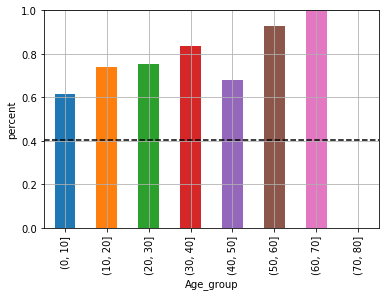

In [372]:

wash_titanic_data=titanic_data.groupby('Sex').get_group('female').copy(deep=True)
wash_data=female_survive_data.copy(deep=True)
data1=wash_titanic_data.groupby('Age_group')['count'].count()

data2=wash_data.groupby('Age_group')['count'].count()



ax=(data2.div(data1,axis=0)).plot(kind='bar',grid=100)

ax.set_ylabel('percent')
ax.set_ylim(0,1)
ax.axhline(survived_percent[1], c='black', ls='--')# -- 标记出总体幸存比例




#### 在女性幸存者中，>50岁的游客幸存比例很高，但各年龄段获救比例都超过了60%

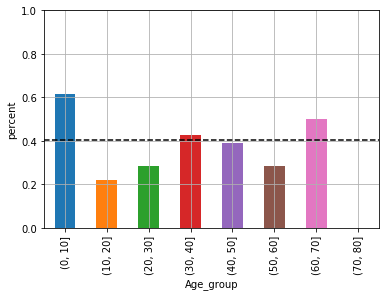

In [373]:
male_wash_titanic_data=titanic_data.groupby('Sex').get_group('male').copy(deep=True)

wash_data2=survive_titanic_data.groupby('Sex').get_group('male')

data4=male_wash_titanic_data.groupby('Age_group')['count'].count()
data3=wash_data2.groupby('Age_group')['count'].count()

ax=(data3.div(data1,axis=0)).plot(kind='bar',grid=100)
ax.set_ylabel('percent')
ax.set_ylim(0,1)
ax.axhline(survived_percent[1], c='black', ls='--')# -- 标记出总体幸存比例




#### 男性幸存者中0-10岁儿童和60-70老年人获救比例最高

In [374]:
#以上分析基于当前数据产生，不适用于真实情况，

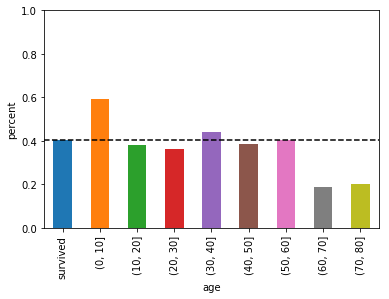

In [375]:
all_survie_age_data=survive_titanic_data.copy(deep=True)
# all_survie_age_data['Age']=survive_titanic_data['Age'].apply(group_age)
# a.groupby('Age')['count'].count()
all_age_data=titanic_data.copy(deep=True)
# all_age_data['Age']=titanic_data['Age'].apply(group_age)

survied_count=all_survie_age_data.groupby('Age_group')['count'].count()
all_count=all_age_data.groupby('Age_group')['count'].count()
a=survived_percent[1:].add((survied_count/all_count),fill_value=0)


a.index.rename('age',inplace=True)

ax=a.plot(kind='bar',)
ax.set_ylabel('percent')
ax.set_ylim(0,1)
ax.axhline(survived_percent[1], c='black', ls='--')# -- 标记出总体幸存比例


#### 0-10岁儿童幸存比例最高

# 泰坦尼克号人员数据分析报告

### 作者：peng

> 项目背景：选取了泰坦尼克号上人员数据进行分析，研究幸存几率是否与性别有关，是否与年纪有关。

> 结论： 幸存者中，女性占大多数，得出女性更容易幸存，但幸存的女性中 >50岁的人几率更高，而男性中是0-10岁的人幸存几率更高。
   总体来看，还是0-10岁儿童获得了最高的幸存几率，其次是30-40岁人，第三是50-60的老年人。最后结论如下：
   
     >1 幸存者的性别影响了幸存几率(女性更容易幸存)

     >2 幸存者中儿童和老年人得到更多的幸存机会

## 本次分析调查并不能推广，因为我们拿到的是只有不到1000人的数据，并不是全部游客的数据，而且数据内容不完全完整，部分含有空缺值的已经被删除，这有可能影响整体调查结果。